機械四 B07502057 李婷穎

In [1]:
import numpy as np
import pandas as pd
import csv
from scipy.sparse import linalg  
from numpy.linalg import eig
import matplotlib.pyplot as plt

adjcent matrix A

In [2]:
# transfer adjacent_matrix-1.csv to adjacent array adj
adj_matrix = pd.read_csv('adjacent_matrix-1.csv', sep=',', header = 0, index_col = 0)

In [3]:
adj = adj_matrix.to_numpy()

diagonal degree matrix D

In [4]:
# compute degree of node i
deg = np.zeros(shape = (69, 69), dtype = int) 
for i in range(0,69):
    for j in range(0,69):
        deg[i][i] += adj[i][j]

laplacian L = D - A

In [5]:
# compute laplacian array lap
lap = deg - adj

eigenvalues and eigenvectors

In [6]:
# find the 1st-3rd eigenvalues and eigenvectors of lap
eigenvalue, eigenvector = linalg.eigsh(lap, k = 3, which='SA' )

In [7]:
# convert eigenvector's row to column and store as eigen.csv
eigen = pd.DataFrame(eigenvector.T)

In [8]:
eigen.to_csv('eigen.csv', index = False, header = False)

spectral clustering

In [9]:
# let X be the matrix containing the 2nd and 3rd smallest eigenvectors as column
X = eigenvector[:,1:]

k-means

assign each node to its closest centroid (cluster)

In [10]:
def cluster (k, X, C): 
    community = []
    for i in range(k):
        community.append([])
    for i in range(69):
        mindis = 100000000
        for j in range(k):
            dis = ((X[i][0] - C[j][0]) ** 2 + (X[i][1] - C[j][1]) ** 2 )
            if dis < mindis:
                mindis = dis
                t = j
        community[t].append(i)
    return community

compute the new centroid of each cluster (centroid)

In [11]:
def centroid (k, X, community):
    center = []
    for i in range(k):
        center.append([])
    for i in range(k): 
        l = len(community[i])
        if l == 0:
            l = 1
        center[i] = sum(X[community[i]]) / l
    return center

k-means

In [12]:
def kmeans(k, X, C):  
    community = cluster(k, X, C)
    center = centroid(k, X, community)
    new = np.array(center)
    if (np.array_equal(C, new) == False ):        
        kmeans(k, X, new)
    # store each node with its # of community
    m = [0]*69
    for i in range(3):
        for item in community[i]:
            m[item] = i            
   
    return m

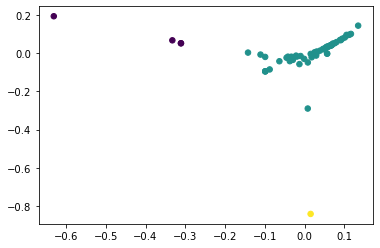

In [13]:
# randomly initialize 3 centroids
C = [[0,0],[0,0],[0,0]]
for i in range(3):
    index = np.random.randint(69)
    C[i][0] = X[index][0]
    C[i][1] = X[index][1]    

r = kmeans(3, X, C)

# plot the result r
plt.scatter(X[:, 0], X[:, 1], c = r, s = 30, cmap = 'viridis')        

In [14]:
# store the result r as result.csv
res = pd.DataFrame(r)
res.T.to_csv('result.csv', index = False, header = False)